# <h1 style="font-size:40px; color:blue">Mobile Price Classification</h1>

# <p><span>Step 1</span> | Import Libraries</p>

In [1]:
import pandas as pd
from pycaret.classification import *

# <p><span>Step 2</span> | Read Dataset</p>

In [4]:
train_df = pd.read_csv("/kaggle/input/mobile-price-classification/train.csv")

In [3]:
train_df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


# <p><span>Step 3</span> | Dataset Overview</p>

In [10]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [8]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.51850,439.418206,501.0,851.75,1226.0,1615.25,1998.0
blue,2000.0,0.49500,0.500100,0.0,0.00,0.0,1.00,1.0
clock_speed,2000.0,1.52225,0.816004,0.5,0.70,1.5,2.20,3.0
dual_sim,2000.0,0.50950,0.500035,0.0,0.00,1.0,1.00,1.0
fc,2000.0,4.30950,4.341444,0.0,1.00,3.0,7.00,19.0
four_g,2000.0,0.52150,0.499662,0.0,0.00,1.0,1.00,1.0
int_memory,2000.0,32.04650,18.145715,2.0,16.00,32.0,48.00,64.0
m_dep,2000.0,0.50175,0.288416,0.1,0.20,0.5,0.80,1.0
mobile_wt,2000.0,140.24900,35.399655,80.0,109.00,141.0,170.00,200.0
n_cores,2000.0,4.52050,2.287837,1.0,3.00,4.0,7.00,8.0



<h3>Inference:</h3>
<ul>
    <li><b>Battery Power:</b> The mean <mark>battery power</mark> of mobile phones in the dataset is approximately 1238 mAh, with a standard deviation of 439.42 mAh. The battery power ranges from 501 mAh to 1998 mAh.</li>
    <li><b>Bluetooth:</b> Around <mark>49.5%</mark> of the mobile phones in the dataset have <mark>Bluetooth</mark> capabilities.</li>
    <li><b>Clock Speed:</b> The average <mark>clock speed</mark> of mobile phones is 1.52 GHz, with a standard deviation of 0.82 GHz. Clock speeds range from 0.5 GHz to 3.0 GHz.</li>
    <li><b>Dual SIM:</b> Approximately <mark>50.9%</mark> of the mobile phones support <mark>dual SIM</mark> functionality.</li>
    <li><b>Front Camera (fc):</b> The mean number of <mark>megapixels</mark> for the <mark>front camera</mark> is 4.31 MP, with a standard deviation of 4.34 MP. Front camera resolutions range from 0 MP to 19 MP.</li>
    <li><b>Internal Memory:</b> The average <mark>internal memory</mark> capacity is 32 GB, with a standard deviation of 18.15 GB. Internal memory sizes range from 2 GB to 64 GB.</li>
    <li><b>Mobile Weight:</b> The mean weight of mobile phones is 140.25 grams, with a standard deviation of 35.40 grams. <mark>Mobile weights</mark> range from 80 grams to 200 grams.</li>
    <li><b>Number of Cores:</b> Mobile phones in the dataset have an average of 4.52 CPU <mark>cores</mark>, with a standard deviation of 2.29 cores. The number of CPU cores ranges from 1 core to 8 cores.</li>
    <li><b>Primary Camera (pc):</b> The mean number of <mark>megapixels</mark> for the <mark>primary camera</mark> is 9.92 MP, with a standard deviation of 6.06 MP. Primary camera resolutions range from 0 MP to 20 MP.</li>
    <li><b>Screen Height (sc_h):</b> The average <mark>screen height</mark> is approximately 12.31 cm, with a standard deviation of 4.21 cm. Screen heights range from 5 cm to 19 cm.</li>
    <li><b>Screen Width (sc_w):</b> The mean <mark>screen width</mark> is 5.77 cm, with a standard deviation of 4.36 cm. Screen widths range from 0 cm to 18 cm.</li>
    <li><b>Talk Time:</b> The average <mark>talk time</mark> of mobile phones is 11.01 hours, with a standard deviation of 5.46 hours. Talk times range from 2 hours to 20 hours.</li>
    <li><b>Price Range:</b> The dataset contains mobile phones categorized into four <mark>price ranges</mark>, with an average <mark>price range</mark> of 1.5. Price ranges vary from 0 to 3.</li>
</ul>

# <p><span>Step 4</span> | Model Building and Evaluation<p>

In [11]:
s = setup(train_df , target = 'price_range' , session_id = 123)

,Description,Value
0,Session id,123
1,Target,price_range
2,Target type,Multiclass
3,Original data shape,"(2000, 21)"
4,Transformed data shape,"(2000, 21)"
5,Transformed train set shape,"(1400, 21)"
6,Transformed test set shape,"(600, 21)"
7,Numeric features,20
8,Preprocess,True
9,Imputation type,simple


In [12]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lda,Linear Discriminant Analysis,0.9400,0.9950,0.9400,0.9431,0.9404,0.9200,0.9207,0.0120
qda,Quadratic Discriminant Analysis,0.9236,0.9944,0.9236,0.9255,0.9233,0.8981,0.8988,0.0170
knn,K Neighbors Classifier,0.9207,0.9894,0.9207,0.9215,0.9203,0.8943,0.8948,0.7200
xgboost,Extreme Gradient Boosting,0.9150,0.9887,0.9150,0.9163,0.9151,0.8867,0.8870,0.0670
gbc,Gradient Boosting Classifier,0.9107,0.9856,0.9107,0.9125,0.9106,0.8810,0.8816,0.2860
lightgbm,Light Gradient Boosting Machine,0.9100,0.9877,0.9100,0.9114,0.9101,0.8800,0.8804,0.4460
rf,Random Forest Classifier,0.8821,0.9767,0.8821,0.8835,0.8817,0.8429,0.8436,0.1000
et,Extra Trees Classifier,0.8614,0.9708,0.8614,0.8628,0.8600,0.8152,0.8165,0.0840
dt,Decision Tree Classifier,0.8271,0.8848,0.8271,0.8283,0.8261,0.7695,0.7705,0.0100
nb,Naive Bayes,0.8086,0.9524,0.8086,0.8114,0.8087,0.7448,0.7455,0.0100


<h3>Inference:</h3>
<ul>
    <li><b>Model:</b> Linear Discriminant Analysis (LDA)</li>
    <li><b>Accuracy:</b> The LDA model achieves an accuracy of <mark>94.00%</mark>, indicating that it correctly predicts the class labels for 94.00% of the instances.</li>
    <li><b>AUC (Area Under the ROC Curve):</b> The AUC score for the LDA model is <mark>99.50%</mark>, indicating its excellent discriminative power between the classes.</li>
    <li><b>Recall:</b> The recall score for the LDA model is <mark>94.00%</mark>, suggesting that it correctly identifies 94.00% of the actual positive instances.</li>
    <li><b>Precision:</b> With a precision score of <mark>94.31%</mark>, the LDA model correctly classifies 94.31% of the predicted positive instances.</li>
    <li><b>F1-score:</b> The F1-score for the LDA model is <mark>94.04%</mark>, representing the harmonic mean of precision and recall.</li>
    <li><b>Kappa:</b> The kappa coefficient for the LDA model is <mark>92.00%</mark>, indicating its agreement with the actual class labels beyond chance.</li>
    <li><b>MCC (Matthews Correlation Coefficient):</b> The MCC score for the LDA model is <mark>92.07%</mark>, reflecting its performance in binary classification tasks.</li>
    <li><b>Training Time:</b> The LDA model has a training time of <mark>0.0120 seconds</mark>, making it computationally efficient.</li>
</ul>

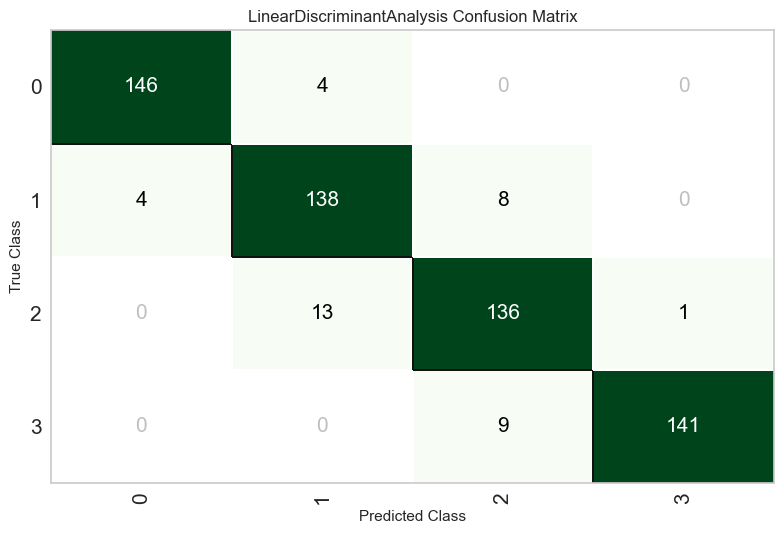

In [13]:
plot_model(best , plot = 'confusion_matrix')

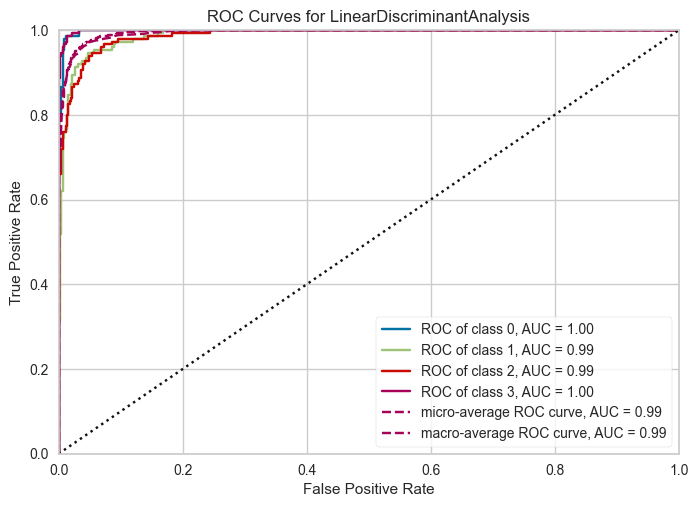

In [14]:
plot_model(best , plot = 'auc')

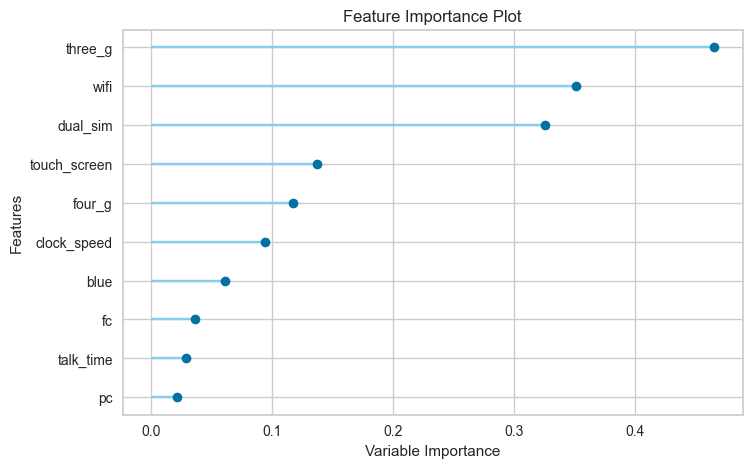

In [23]:
plot_model(best , plot = 'feature')

<h3>Inference:</h3>
<ul>
    <li>The analysis of feature importance reveals that while <mark>Three G</mark>, <mark>Wi-Fi</mark>, and <mark>Dual SIM</mark> features exhibit high variable importance, features such as <mark>PC (Primary Camera Megapixels)</mark>, <mark>Talk Time</mark>, and <mark>Front Camera Megapixels (FC)</mark> have relatively lower importance in predicting mobile prices.</li>
    <li>These findings suggest that consumer preferences and market demands heavily influence the pricing dynamics of mobile devices.</li>
    <li>For businesses in the mobile industry, it's important to consider the following implications:</li>
    <ul>
        <li><b>Strategic Focus:</b> Companies should prioritize features with high variable importance, such as Three G, Wi-Fi, and Dual SIM, in their product development and marketing strategies to meet consumer expectations and enhance competitive positioning.</li>
        <li><b>Cost Optimization:</b> Manufacturers can optimize production costs by allocating resources efficiently, focusing on enhancing key features while rationalizing investments in features with lower variable importance, such as PC, Talk Time, and FC.</li>
        <li><b>Market Differentiation:</b> Emphasizing unique selling points associated with high-importance features can help mobile brands differentiate their products and create value propositions that resonate with target consumers.</li>
    </ul>
</ul>

In [16]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

# <p><span>Step 5</span> | Test Data Label Prediction<p>

In [19]:
test_df = pd.read_csv("/kaggle/input/mobile-price-classification/test.csv")
test_df.drop("id", axis=1, inplace=True)

In [20]:
# Predict samples class
test_df['price_range_pred'] = best.predict(test_df)
test_df['price_range_pred']

0      3
1      3
2      2
3      3
4      1
      ..
995    2
996    1
997    0
998    2
999    2
Name: price_range_pred, Length: 1000, dtype: int8

<h1 style="font-size: 30px">Thank You!</h1>